In [9]:
import numpy as np
import pandas as pd
import visuals as vs
from sklearn.cross_validation import ShuffleSplit

%matplotlib inline

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
    
print data.shape
data.head(5)

(489, 4)


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:
prices.discribe()

count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64

In [6]:
import sklearn.metrics as me
def performance_metric(y_true, y_predict):

    score = me.r2_score(y_true, y_predict)
    
    return score

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 0)

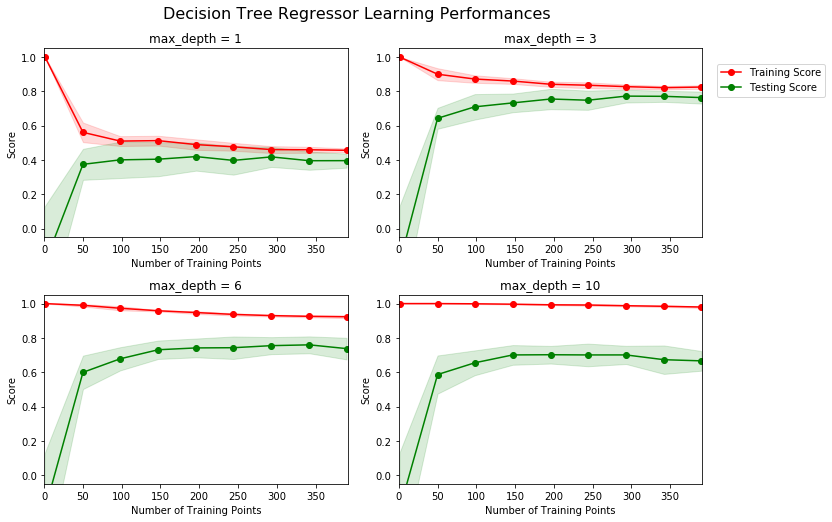

In [10]:
vs.ModelLearning(features, prices)

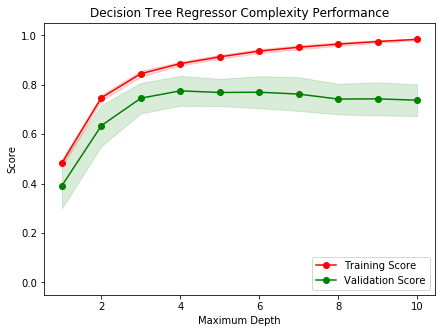

In [11]:
vs.ModelComplexity(X_train, y_train)

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):

    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor()

    params = {'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    grid = grid.fit(X, y)

    return grid.best_estimator_

//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [15]:
reg = fit_model(X_train, y_train)

print reg.get_params()['max_depth']

4


In [17]:
client_data = [[5, 17, 15], 
               [4, 32, 22], 
               [8, 3, 12]] 

reg.predict(client_data)

array([ 391183.33333333,  189123.52941176,  942666.66666667])